## Import the Neccessary Modules

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

ModuleNotFoundError: No module named 'matplotlib'

## Generate the sample data


In [ ]:

dates = pd.date_range(start='2023-01-01', end='2023-12-31')
 
# Generate sales data
data = {
    'Date': np.random.choice(dates, 1000),
    'Product': np.random.choice(['Product A', 'Product B', 'Product C', 'Product D'], 1000),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], 1000),
    'Sales': np.random.randint(10, 1000, 1000)
}
 
df_sales = pd.DataFrame(data)
 
# Save the dataset
df_sales.to_csv('sales_data.csv', index=False)

df_sales.head()

,Date,Product,Region,Sales
0,2023-02-03,Product B,South,203
1,2023-04-23,Product B,East,463
2,2023-11-11,Product B,East,561
3,2023-06-16,Product B,East,871
4,2023-10-31,Product D,East,167


## 1) Calculate Total sales 

In [ ]:
Total_sale = df_sales['Sales'].sum()
Total_sale

498540

## 2) Group by 'Date' and calculate the mean of the 'Sales' column

In [ ]:
meansalesByDate=df_sales.groupby('Date')['Sales'].mean().sum().round(2)
print(meansalesByDate)

167391.4


## 3) Identify the top-performing product in terms of total sales


In [ ]:
total_sales_by_product = df_sales.groupby('Product')['Sales'].sum()
top_performing_product = total_sales_by_product.idxmax()
top_performing_product_sales = total_sales_by_product.max()
print('The top performing products is:',top_performing_product,'with a total of',top_performing_product_sales,'sales')

The top performing products is: Product D with a total of 131821 sales


## 4) Create a bar chart showing sales by region with different colors

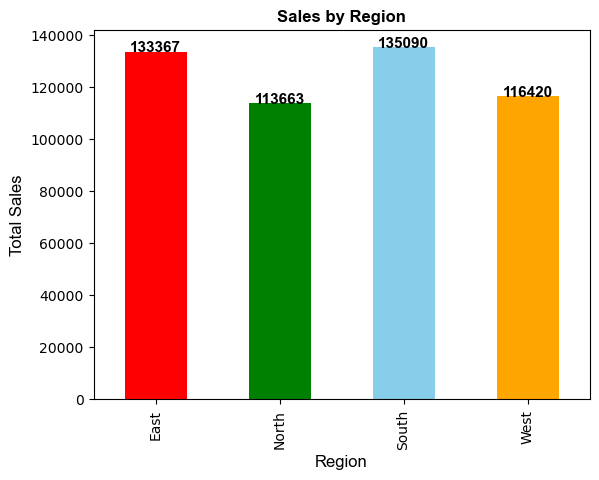

In [ ]:
total_sales_by_region = df_sales.groupby('Region')['Sales'].sum()
bars = total_sales_by_region.plot(kind='bar', color=['r', 'g', 'skyblue', 'orange'])
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 8,               
             f'{bar.get_height()}',              
             ha='center',                        
             fontsize=11,                        
             fontfamily='arial',                 
             fontweight='bold')  
plt.title('Sales by Region', fontsize=12, fontfamily='arial', fontweight='bold')
plt.xlabel('Region', fontsize=12, fontfamily='arial')
plt.ylabel('Total Sales', fontsize=12, fontfamily='arial')
plt.show()

## 5) Determine the day with the highest sales

In [ ]:
highest_sales_day = df_sales.loc[df_sales['Sales'].idxmax()]['Date']
highest_sales_day = highest_sales_day.strftime('%Y-%m-%d')
highest_sales_value = df_sales.loc[df_sales['Sales'].max()]['Sales']
print(f"Day with the Highest Sales: {highest_sales_day} with Sales of {highest_sales_value}")

Day with the Highest Sales: 2023-09-07 with Sales of 165


## 6) Calculate the percentage of total sales contributed by each region

In [ ]:
percentage_sales_by_region = round((total_sales_by_region / df_sales['Sales'].sum()) * 100,2)
print("\nPercentage of Total Sales by Region:")
print(percentage_sales_by_region)


Percentage of Total Sales by Region:
Region
East     26.75
North    22.80
South    27.10
West     23.35
Name: Sales, dtype: float64


## 7) Identify the month with the highest total sales

In [ ]:
df_sales['Month'] = df_sales['Date'].dt.to_period('M')
total_sales_by_month = df_sales.groupby('Month')['Sales'].sum()
highest_sales_month = total_sales_by_month.idxmax()
highest_sales_month_value = total_sales_by_month.max()
highest_sales_month_name = highest_sales_month.start_time.strftime('%B')
print(f"\n{highest_sales_month_name} is the Month with the Highest Total Sales: {highest_sales_month_value}")


January is the Month with the Highest Total Sales: 49329


## 8) Design a simple dashboard layout using the calculated metrics and visualizations.

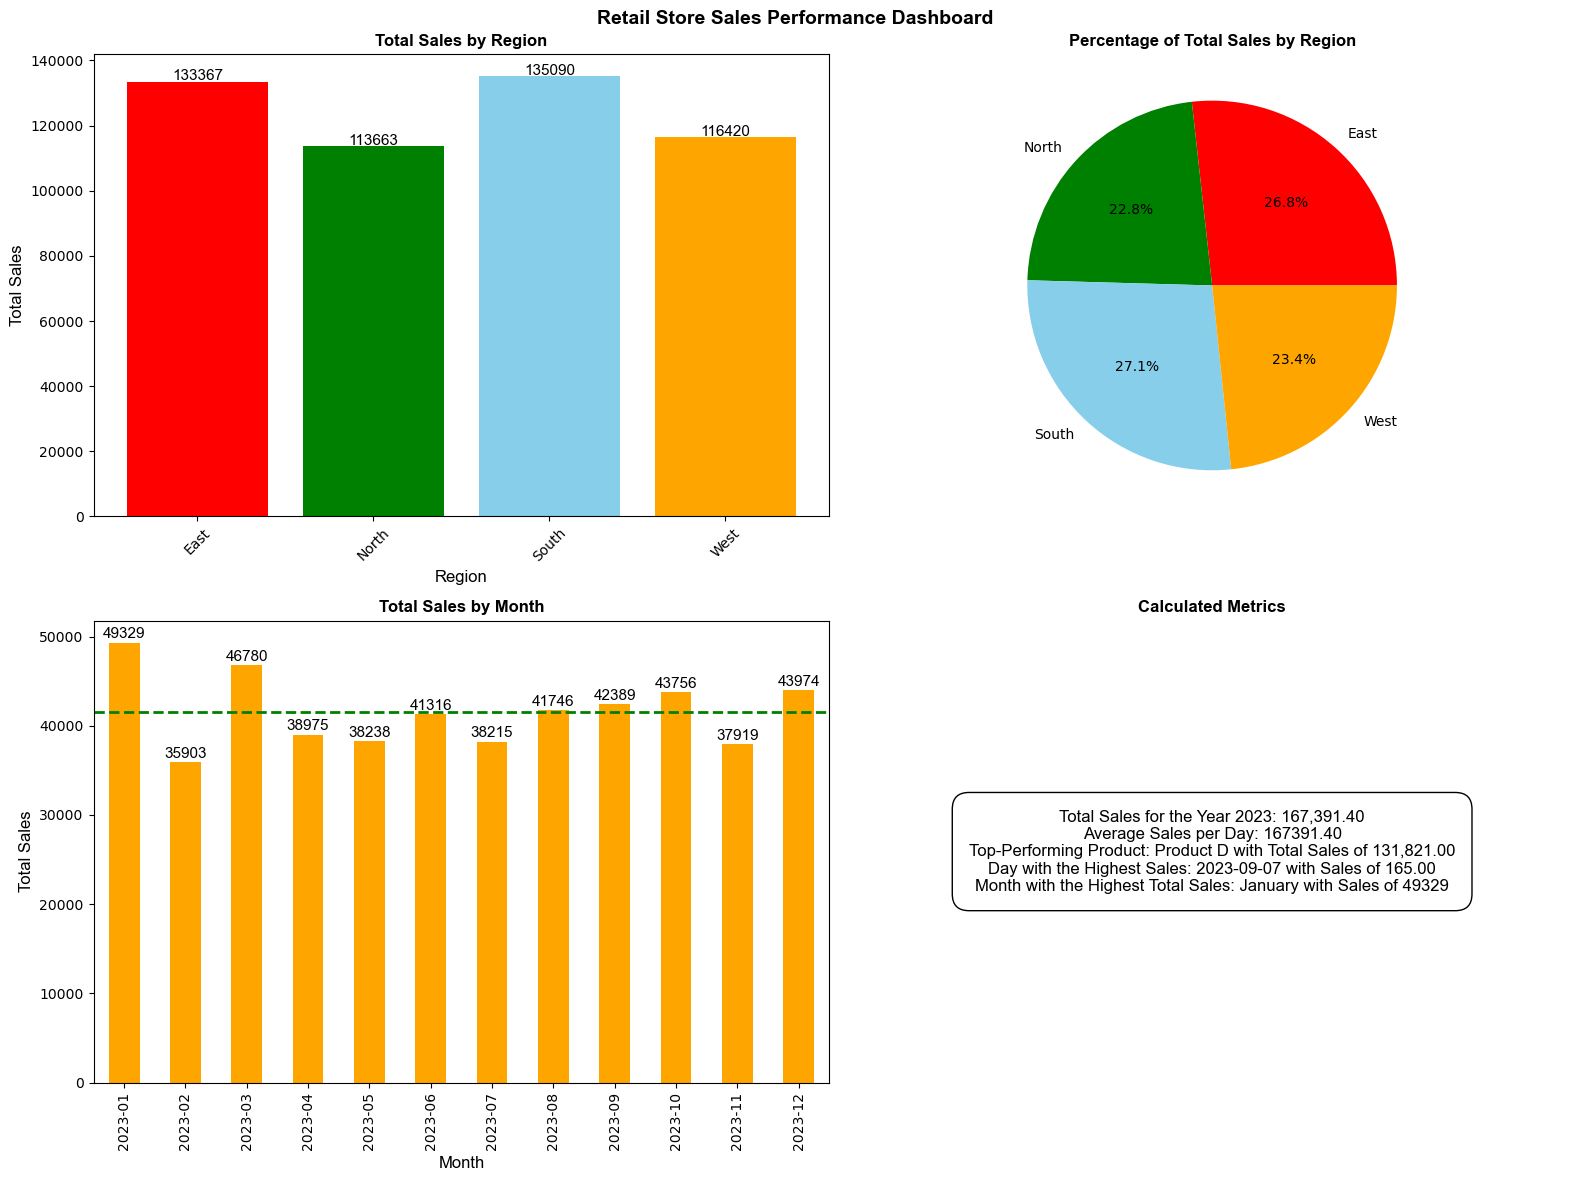

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
plt.suptitle('Retail Store Sales Performance Dashboard', fontfamily='arial', fontweight='bold', fontsize='14')

# Plot total sales by region
total_sales_by_region = df_sales.groupby('Region')['Sales'].sum()
bars_region = axs[0, 0].bar(total_sales_by_region.index, total_sales_by_region, color=['r', 'g', 'skyblue', 'orange'])
axs[0, 0].set_title('Total Sales by Region', fontfamily='arial', fontweight='bold', fontsize='12')
axs[0, 0].set_xlabel('Region', fontfamily='arial', fontsize='12')
axs[0, 0].set_ylabel('Total Sales', fontfamily='arial', fontsize='12')
axs[0, 0].tick_params(axis='x', rotation=45)

# Add numeric values to bars in the 'Total Sales by Region' plot
for bar in bars_region:
    axs[0, 0].text(bar.get_x() + bar.get_width() / 2, 
                   bar.get_height() + 500,  
                   f'{bar.get_height()}', 
                   ha='center', 
                   fontsize=11, 
                   fontfamily='arial')

# Plot percentage sales by region
percentage_sales_by_region = total_sales_by_region / total_sales_by_region.sum() * 100
axs[0, 1].pie(percentage_sales_by_region, labels=percentage_sales_by_region.index, autopct='%1.1f%%', colors=['r', 'g', 'skyblue', 'orange'])
axs[0, 1].set_title('Percentage of Total Sales by Region', fontfamily='arial', fontweight='bold', fontsize='12')

# Plot sales by month
total_sales_by_month.plot(kind='bar', ax=axs[1, 0], color='orange')
average_monthly_sales = total_sales_by_month.mean()
axs[1, 0].axhline(y=average_monthly_sales, color='g', linestyle='--', linewidth=2, label=f'Average Monthly Sales ({average_monthly_sales:.2f})')
axs[1, 0].set_title('Total Sales by Month', fontfamily='arial', fontweight='bold', fontsize='12')
axs[1, 0].set_xlabel('Month', fontfamily='arial', fontsize='12')
axs[1, 0].set_ylabel('Total Sales', fontfamily='arial', fontsize='12')

# Add numeric values to bars in the 'Total Sales by Month' plot
bars_month = axs[1, 0].patches
for bar in bars_month:
    axs[1, 0].text(bar.get_x() + bar.get_width() / 2, 
                   bar.get_height() + 500, 
                   f'{bar.get_height()}', 
                   ha='center', 
                   fontsize=11, 
                   fontfamily='arial')

# Dashboard metrics
dashboard_text = (
    f"Total Sales for the Year 2023: {meansalesByDate:,.2f}\n"
    f"Average Sales per Day: {meansalesByDate:.2f}\n"
    f"Top-Performing Product: {top_performing_product} with Total Sales of {top_performing_product_sales:,.2f}\n"
    f"Day with the Highest Sales: {highest_sales_day} with Sales of {highest_sales_value:,.2f}\n"
    f"Month with the Highest Total Sales: {highest_sales_month_name} with Sales of {highest_sales_month_value}"
)

# Display metrics
axs[1, 1].set_title('Calculated Metrics', fontfamily='arial', fontweight='bold', fontsize='12')
axs[1, 1].text(0.5, 0.5, dashboard_text, fontfamily='arial', fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()
